In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Q1

In [8]:
img = cv.imread('coins_1.jfif')
img_copy = img.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Hough circle transform
row = img.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/8, param1 = 350, param2 = 25)

if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        # get the center of the circle
        center = (i[0], i[1])
        # draw the whole circle
        radius = i[2]
        cv.circle(img, center, radius, (255, 0, 0), 2)
        
# Blob detection
blur = cv.medianBlur(img_copy, 5)
gray_blob = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)
# parameter setting
params = cv.SimpleBlobDetector_Params()

# turn off the filter to get maximum amount of blob
params.filterByConvexity = False
params.filterByInertia = False
params.filterByArea = True

# detect light blob
params.filterByColor = True
params.blobColor = 255

# detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray_blob)

# draw
im_keypoints = cv.drawKeypoints(img_copy, keypoints, np.array([]), (0, 0, 255),
                               cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow('image', np.hstack([img, im_keypoints]))

cv.waitKey(0)
cv.destroyAllWindows()

Hough circle transform is able to get 9 out of 10 edges of the circles perfectly.

Blob detection is only able to get 4 out of 10 edges.

Hough circle transform has achieved better results.

# Q2
Q2 Apply k-means clustering on 'zebra.jfif' to segment out the zebra.
* You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
* Apply the clustering method on 2 color space: BGR and HSV and compare the results obtained.

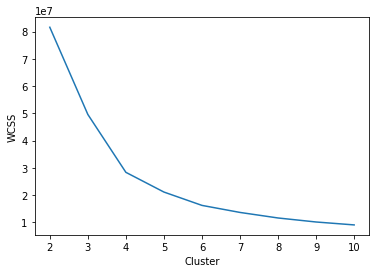

In [9]:
from sklearn.cluster import KMeans

img = cv.imread("zebra.jfif")
img_reshape = img.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    
    kmeans.fit_predict(img_reshape)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 11), wcss)
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.show()

In [10]:
img = cv.imread("zebra.jfif")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

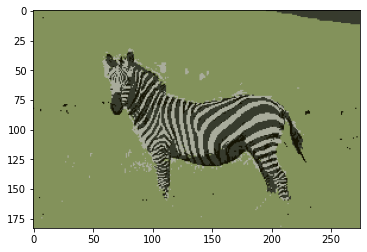

In [11]:
# Convert the image to HSV
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# reshape and convert to float32
img_reshape = img_hsv.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

# Define criteria, attempts and number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
K = 4

ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# Convert the center to np.uint8
center = np.uint8(center)
res = center[label.flatten()]
result_img = res.reshape(img_hsv.shape)

plt.imshow(cv.cvtColor(result_img, cv.COLOR_HSV2RGB))
plt.show()

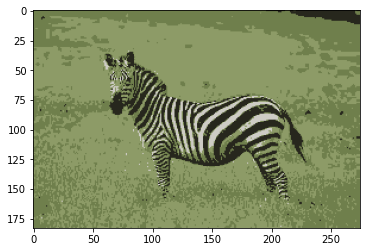

In [13]:
img_reshape_bgr = img.reshape((-1, 3))
img_reshape_bgr = np.float32(img_reshape_bgr)

# Define criteria, attempts and number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
K = 4

ret, label, center = cv.kmeans(img_reshape_bgr, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# Convert the center to np.uint8
center = np.uint8(center)
res = center[label.flatten()]
result_img_bgr = res.reshape(img.shape)

plt.imshow(cv.cvtColor(result_img_bgr, cv.COLOR_BGR2RGB))
plt.show()

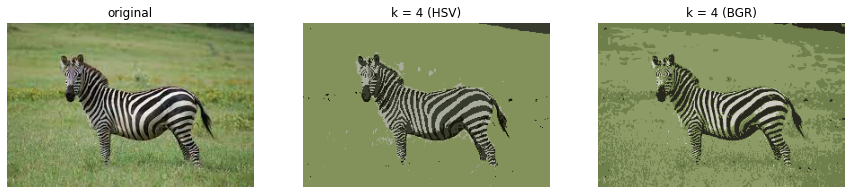

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('original'), plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(result_img, cv.COLOR_HSV2RGB))
plt.title(f'k = {K} (HSV)'), plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result_img_bgr, cv.COLOR_BGR2RGB))
plt.title(f'k = {K} (BGR)'), plt.axis("off")
plt.show()

The results obtained with HSV color space is better as it segments out the zebra without getting the background grass.

The results obtained with BGR color space is still considered good as the zebra is obtained but the background grass is also involved. Some of the segmented zebra colour's is also mixed with the grass colour.

Hence, k-means clustering on HSV color space images has achieved better results overall.